# Convolution

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

## 2D case
### $h[i][j] = \sum_{k} \sum_{l} \mathcal{K}[k][l] \;\; f[i-k][j-l]$


![gif](2DConvolution.gif) \
Ref: https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37

## Generating input data and Kernel

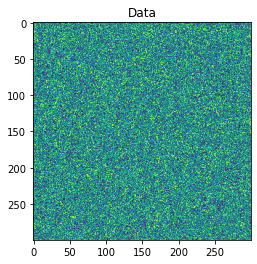

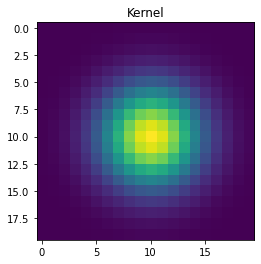

In [2]:
Height, Width = 300, 300
KernelSize = 20

f = 0.5 - np.random.rand( Height , Width )

Kernel = np.zeros( [KernelSize , KernelSize] )

for i in range( KernelSize ):
    for j in range( KernelSize ):
        Kernel[i][j] = np.exp( - ((i-KernelSize/2)**2 + (j-KernelSize/2)**2) / KernelSize )

plt.imshow(f)
plt.title('Data')
plt.show()

plt.imshow(Kernel)
plt.title('Kernel')
plt.show()

## Perform convolution

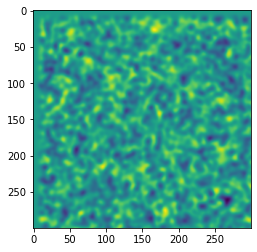

In [3]:
h = np.zeros( [Height , Width] )

for i in range( Height ):
    for j in range( Width ):

        for k in range( KernelSize ):
            for l in range( KernelSize ):
        
                if ((i-k)>=0) and ((i-k)<Height) :
                    if ((j-l)>=0) and ((j-l)<Width) :
                        h[i][j] = h[i][j] + Kernel[k][l] * f[i-k][j-l]

plt.imshow(h)
plt.show()

# Learning to estimate the Kernel from input and convolved data

### If $\tilde{\mathcal{K}}$ is the estimated kernel, then the estimated output is
### $g[i][j] = \sum_{k} \sum_{l} \tilde{\mathcal{K}}[k][l] \; f[i-k][j-l]$
### then the error in the $(i,j)^{th}$ grid point is
### $\mathcal{E}[i][j] := (g[i][j] - h[i][j])^2$
### Now, the estimated kernel update is performed as the error gradient descent in
### $\tilde{\mathcal{K}}[k][l] \rightarrow \tilde{\mathcal{K}}[k][l] - \eta \; \frac{\partial \mathcal{E}[i][j]}{\partial \tilde{\mathcal{K}}[k][l]}$
### $ \;\; = \tilde{\mathcal{K}}[k][l] - \eta \;2 (g[i][j]-h[i][j]) \; f[i-k][j-l]$ 

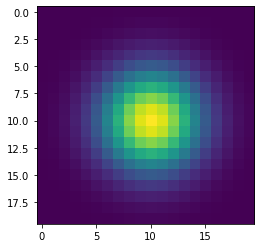

In [4]:
MaxEpochs = 10000
LearningRate = 0.01

EstimatedKernel = np.zeros( [KernelSize , KernelSize] )

for EpochNumber in range( MaxEpochs ):
    i = int( np.floor( Height * np.random.rand(1)) )
    j = int( np.floor( Width * np.random.rand(1)) )
    g = 0
    
    for k in range( KernelSize ):
        for l in range( KernelSize ):
            if ((i-k)>=0) and ((i-k)<Height) and ((j-l)>=0) and ((j-l)<Width) :
                g = g + EstimatedKernel[k][l] * f[i-k][j-l]

    for k in range( KernelSize ):
        for l in range( KernelSize ):
            if ((i-k)>=0) and ((i-k)<Height) and ((j-l)>=0) and ((j-l)<Width) :
                EstimatedKernel[k][l] = EstimatedKernel[k][l] - LearningRate * 2 * (g-h[i][j]) * f[i-k][j-l]

plt.imshow( EstimatedKernel )
plt.show()